# Text Classification with Bag of Words - Natural Language Processing

![](https://i.imgur.com/hlEQ5X8.png)

> _"Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data."_ - Wikipedia

> _**Bag of Words**: The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears._
 
Outline:

1. Download and explore a real-world dataset
2. Apply text preprocessing techniques
3. Implement the bag of words model
4. Train ML models for text classification
5. Make predictions and submit to Kaggle


Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

## Download and Explore the Data

Outline:

1. Download the dataset from Kaggle
2. Explore the data using Pandas
3. Create a small working sample

# Downloading The dataset

- the bellow commond is not a python commond this is the terminal commond, we can also run terminal commonds here easly

In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is 960C-E226

 Directory of C:\Users\dhara\Desktop\VIT_AP\githubrepo\Natural-Language-Processing\src

01/27/2024  10:39 AM    <DIR>          .
01/27/2024  10:39 AM    <DIR>          ..
01/27/2024  10:15 AM    <DIR>          .ipynb_checkpoints
01/16/2024  12:43 PM    <DIR>          dataset
01/27/2024  10:30 AM                62 kaggle.json
01/27/2024  10:39 AM             7,973 NLP01_QuoraInsincereQuestions_TextClassification.ipynb
12/11/2019  05:32 AM       579,862,528 quora-insincere-questions-classification.zip
               3 File(s)    579,870,563 bytes
               4 Dir(s)  132,223,520,768 bytes free


In [2]:
import os

In [3]:
# now we are just setting a shell environment variable which inform the Kaggle api(kaggle commond line tool) where the config file is located.
os.environ['KAGGLE_CONFIG_DIR']='.' # setting to current directory so it can fetch the kaggle.json easily

- here is the link -> https://github.com/kaggle/kaggle-api
- where you can get the info to download the dataset from the kaggle

In [4]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p dataset


  0%|          | 0.00/54.9M [00:00<?, ?B/s]
  2%|1         | 1.00M/54.9M [00:01<01:10, 802kB/s]
  4%|3         | 2.00M/54.9M [00:01<00:36, 1.53MB/s]
  5%|5         | 3.00M/54.9M [00:01<00:25, 2.12MB/s]
  7%|7         | 4.00M/54.9M [00:02<00:20, 2.62MB/s]
  9%|9         | 5.00M/54.9M [00:02<00:17, 3.06MB/s]
 11%|#         | 6.00M/54.9M [00:02<00:15, 3.39MB/s]
 13%|#2        | 7.00M/54.9M [00:02<00:13, 3.62MB/s]
 15%|#4        | 8.00M/54.9M [00:03<00:12, 3.84MB/s]
 16%|#6        | 9.00M/54.9M [00:03<00:12, 3.80MB/s]
 18%|#8        | 10.0M/54.9M [00:03<00:12, 3.91MB/s]
 20%|##        | 11.0M/54.9M [00:03<00:11, 4.02MB/s]
 22%|##1       | 12.0M/54.9M [00:04<00:11, 3.96MB/s]
 24%|##3       | 13.0M/54.9M [00:04<00:11, 3.91MB/s]
 25%|##5       | 14.0M/54.9M [00:04<00:10, 3.93MB/s]
 27%|##7       | 15.0M/54.9M [00:04<00:10, 3.99MB/s]
 29%|##9       | 16.0M/54.9M [00:05<00:10, 3.97MB/s]
 31%|###       | 17.0M/54.9M [00:05<00:09, 4.08MB/s]
 33%|###2      | 18.0M/54.9M [00:05<00:09, 4.14MB/s]
 3

- Downloading test.csv and smaple_submission.csv also

In [5]:
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p dataset

403 - Forbidden - Permission 'competitions.participate' was denied




  0%|          | 0.00/4.09M [00:00<?, ?B/s]
 24%|##4       | 1.00M/4.09M [00:01<00:03, 846kB/s]
 49%|####8     | 2.00M/4.09M [00:01<00:01, 1.59MB/s]
 73%|#######3  | 3.00M/4.09M [00:01<00:00, 2.22MB/s]
 98%|#########7| 4.00M/4.09M [00:01<00:00, 2.76MB/s]
100%|##########| 4.09M/4.09M [00:01<00:00, 2.15MB/s]


# Exploring data using Pandas
Pandas library can also be used to explore the zip data

In [7]:
train_fname = 'dataset/NLP01_train.csv.zip'
test_fname = 'dataset/NLP01_test.csv.zip'
smaple_submission_fname = 'dataset/NLP01_sample_submission.csv.zip'

In [8]:
import pandas as pd

In [10]:
raw_df = pd.read_csv(train_fname)

In [11]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [12]:
sincere_df = raw_df[raw_df.target == 0]

In [13]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [14]:
insincere_df = raw_df[raw_df.target == 1]

In [15]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [16]:
raw_df.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

<AxesSubplot: >

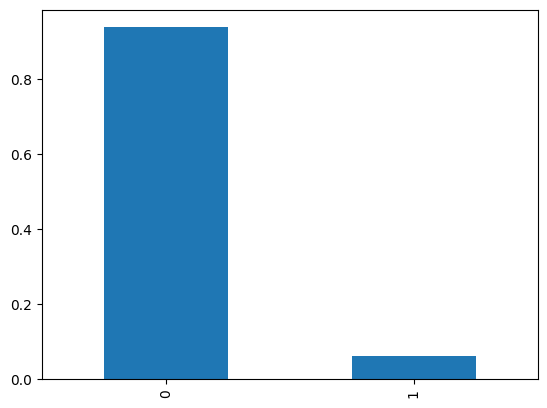

In [17]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [18]:
test_df = pd.read_csv(test_fname)

In [19]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [23]:
sub_df = pd.read_csv(smaple_submission_fname)

In [24]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [25]:
sub_df.prediction.value_counts() # this is the sample submission data where all the target value is 0

0    375806
Name: prediction, dtype: int64

# Create a Working Sample

In [26]:
SAMPLE_SIZE = 100_000 # working with these huge amount of data can become a little difficult, so we will work on small dataset

In [27]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)

In [28]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


# Text Preprocessing Techniques

Outline:

1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

# 1. Bag of Words Intuition

1. Create a list of all the words across all the text documents.
2. You convert each document into vector counts of each word, converting it into integer vector, bcz machine can understand only numbers.
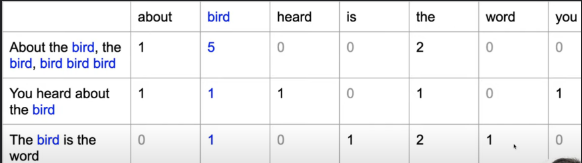

3. now we are left with the vectors, which is called document vector.<br>
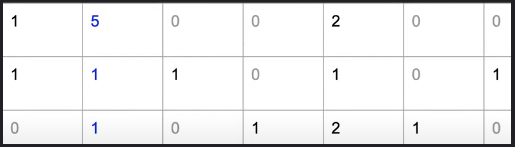

Limitations:
1. There may be too many words in the dataset so we have 1.3 millions data in dataset and it may contain 100_000 of words that make vectors very large each docuemnt is the size o 100_000 and that even won't fit in the memory.

2. Some words may occur too frequently (eg :- the, is ...)
3. Some words may occur very rarely or only once that is need to remove bcz they won't decide a document is sincere or not.
4. A single word may have many forms (go, gone, going or bird vs. birds so that is the thing these word should get count under the same root word, so that's y we perform several preprocessing techniques before creating the bagof words model)

# 2. Tokenization

Tokenization is simply the process of splitting a document into words and separators(we also need to deal with ',', punctuation, brackets, etc).

In [30]:
# pciking up a question from sincere dataframe
q0 = sincere_df.question_text.values[1]
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [31]:
# picking up a question from insincere dataframe
q1 = insincere_df.question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

In [32]:
# Tokenization -> splitting a document into words and sepearators
# so the way we tokenize either we can split along the spaces or we can use a tool which detects punctuations properly
from nltk.tokenize import word_tokenize # this lib can detect puntuations too

In [33]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [37]:
import nltk

In [38]:
nltk.download('punkt') # its the dictionary of punctuation's

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
word_tokenize(q0) # q0 got split into bunches of tokens

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [40]:
# we can also tokenize our own example
word_tokenize("this is (something) with, a lot of, punctuation;")

['this',
 'is',
 '(',
 'something',
 ')',
 'with',
 ',',
 'a',
 'lot',
 'of',
 ',',
 'punctuation',
 ';']

In [41]:
# tokenizing q1
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [42]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

# 3. Stop words Removal
It s simply the process of removal of commonly occurring word

In [43]:
from nltk.corpus import stopwords

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [45]:
english_stopwords = stopwords.words('english')

In [46]:
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
# a good way to see all the words
", ".join(english_stopwords)
# One thing it will be noticed here words like not, couldn't, didn't etc ... also show up here, so for the purpose
# text classification(like sincere and insincere ques) this may not be something need to worry about
# but for the sentimental analysis we may want to retain some of these stop words

# so there is always a suggestion to look through all the stop word and decide if you want to use the stop words
# and pick all those stop word you only want in use

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [51]:
# so how we remove stop words

# one warning here all the words in stop_words are in lower case but in our data we dont have the word in
# lower case which is need to be done

# def remove_stopwords(tokens):
#     return [word for word in tokens if word.lower() not in english_stopwords]

def remove_stopwords(tokens): # this fun takes list of tokens and remove the stop words
    l = []
    for word in tokens:
        if word.lower() not in english_stopwords:
            l.append(word)
    
    return l

In [52]:
remove_stopwords(q0_tok)

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [53]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [54]:
q0_stp = remove_stopwords(q0_tok)
q0_stp
# so we can see we will now use some of the tokens now
# so obviously the senetence is start loosing the meaning already but we are creaeting bag pf word which is
# not really concerned about the order thst is one of the limitations of the bag of words and that's
# how it is designed

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [55]:
q1_stp = remove_stopwords(q1_tok)
q1_stp
# now again we can see that bunch of words are gone away
# this is already going to greatly reduce our vocabulary size bcz the most common words will be gone and this si going
# to remove common words that is going to have unfaire effect on the machine learning model and prety
# much occur in every questions so that what we have done stop word removal

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

# 4. Stemming
It is simply to turning things like 'go' 'gone' 'going' into its root word i.e. go

Why do we do this?
bcz in terms of frequency in terms of the meaning both these thing will have the exact same effect essentially
when we are dealing with bag of words.
so we want to reduce the vocabulary size and increase the frequency of the root word itself.

In [56]:
# there are differnt type of stemmer, but here we are going with snowball stemmer
from nltk.stem.snowball import SnowballStemmer

In [57]:
# creating the object of english stemmer
stemmer = SnowballStemmer(language='english')

In [58]:
stemmer.stem('going')

'go'

In [59]:
stemmer.stem('supposedly')
# some time it won't return sensible words bcz they just be the root of some potential family

'suppos'

In [60]:
q0_stm = [stemmer.stem(word) for word in q0_stp]
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [61]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [62]:
q1_stm = [stemmer.stem(word) for word in q1_stp]
q1_stm, q1_stp

(['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?'],
 ['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?'])

# 4. lemmatization
This reduce the word to a word which actually make sense.

Here what is done -> let say we have the word 
love -> love
loving -> love, lemmatization would remove ing and add the e and how would it know to add the e bcz lemmatization is going to look into a dictionary for the root words
lovable -> love

so if you want more human friendly form of the word you can use lemmatization

In [63]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [66]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhara\AppData\Roaming\nltk_data...


True

In [64]:
lemmatizer = WordNetLemmatizer()
# lemmatization is generally not used by building bag of words bcz it requires looking up a dictionary
# which can be fairly slow especially for bag of words or when you have a large dictionary and it also take up large memory
# bcz we are going to turn our documents to vector any way, it doen't matter that the short form is root of a word or its an actual
# word from the dictionary so here we will not be using lemmatization

# aprt from this nltk allows you to recognize parts of speech(pos) and many other thing

In [68]:
print("love:", lemmatizer.lemmatize("loves", wordnet.VERB))
print("loving:", lemmatizer.lemmatize("loveing", wordnet.VERB))
print("loved:", lemmatizer.lemmatize("loved", pos=wordnet.VERB))

love: love
loving: love
loved: love


# Implement Bag of Words 

Outline:

1. Create a vocabulary using Count Vectorizer
2. Transform text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer

In [73]:
sample_df[900:909]

,qid,question_text,target
335042,41a7f510c21f65deb6fd,Why is D'Angelo such a gay name?,0
825275,a1bbea7d64b38018704e,Why does Dr. Kim Jong-un have a degree in econ...,0
376124,49bb02280a82dede3868,Would I save money on closing fees if I bought...,0
753172,938fd6d37c7ef85cf70d,I'd like to cast Netflix to Chromecast for my ...,0
253260,3190daf8a86e847a25b0,Why were people so mean to this poor man?,0
1301231,ff0aabafcd27d3d2c62a,Why do ultrafast laser pulses generate more el...,0
692611,87a9de40ec1926046441,Why is Pakistan still friends with China and S...,1
1100534,d7af30bcd5620537fc92,Why is the BJP not using the credibility of Su...,0
220398,2b1faebaf46416da6c1e,Is there a statistically significant differenc...,0


In [74]:
# lets see some 5 questions
small_df = sample_df[:5]

In [79]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [78]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

### 1. Create a Vocabulary

- for Count Vectorizer -> https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [80]:
from sklearn.feature_extraction.text import CountVectorizer # this converts the collection of text documnents to a matrix of token counts

In [81]:
small_vect = CountVectorizer()

In [84]:
small_vect.fit(small_df.question_text) # .fit is used to learn the vocabulary

CountVectorizer()

In [85]:
small_vect.vocabulary_ # this without any text preprocessing(stemming, reval of stop words etc)

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [86]:
# for actual list of voabulary words
small_vect.get_feature_names_out()# so far we have pick out all the vocabulary, but we didn't convert it to the documnent vectors

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### 2. Transform documents into Vectors

In [87]:
vectors = small_vect.transform(small_df.question_text) # .transform is used to transform document into documnent-term matrix

In [88]:
vectors
# it says vector is a spare matrix
# bcz there are 56 entries in vocabulary and a particular sentence may have 5 or 6 of words in them, so most of the values are 0
# to store this efficienty numpy internally uses called sparse matrix

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [89]:
vectors.toarray() # be carefull while converting the vectors to sparse matrix bcz it can run out of memory
# here the sparse matrix is small

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [94]:
small_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [95]:
vectors[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0]], dtype=int64)

### 3. Configure Count Vectorizer Parameters

In [96]:
stemmer = SnowballStemmer(language='english')

In [101]:
def tokenize(text): # this is tokenizing, removing stop word and stemming thre words
    return [stemmer.stem(word) for word in word_tokenize(text) if word.lower() not in english_stopwords]

In [102]:
tokenize('What is the really (dealing) here?')

['realli', '(', 'deal', ')', '?']

In [105]:
# creating another vectorizer for the 100000 of data, the total dataset which we are going to use here
# just have look for all the functions on .org
vectorizer = CountVectorizer(lowercase=True, 
                             tokenizer=tokenize, # it have takenizer built in but we can also provide the tokenizer, here tokenize is the fun
                             stop_words=english_stopwords, # also used while tokenizing, no need of using it at two positions
                             max_features=1000) # it going to consider top 1000 of vocab based on frequency accross the corpus, practice eith 2k or 3k here using 1k bcz it may take langer to execute

In [106]:
%%time # this print out the time it took to execute
# makng learn the vocabs
vectorizer.fit(sample_df.question_text) # so now giving the content for preprocessing

CPU times: total: 54.3 s
Wall time: 54.5 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x0000028A04D9B7F0>)

In [107]:
vectorizer.vocabulary_

{'effect': 298,
 'manag': 546,
 'creat': 235,
 'good': 400,
 'learn': 508,
 '?': 31,
 'studi': 872,
 'abroad': 36,
 'class': 194,
 'make': 543,
 'friend': 379,
 'colleg': 202,
 'download': 281,
 'free': 377,
 ':': 30,
 '(': 8,
 'iphon': 476,
 ')': 9,
 'like': 521,
 ',': 10,
 '``': 34,
 "''": 5,
 'also': 67,
 'onlin': 635,
 'invest': 474,
 'platform': 677,
 'direct': 273,
 'fund': 382,
 'record': 747,
 'read': 738,
 'term': 901,
 "'s": 7,
 'role': 774,
 'get': 392,
 'univers': 938,
 'germani': 391,
 'new': 613,
 'skill': 829,
 'anyth': 81,
 'old': 633,
 'english': 310,
 'militari': 578,
 'capit': 159,
 'way': 958,
 'earn': 289,
 'money': 588,
 'use': 942,
 'brand': 142,
 'car': 160,
 'alway': 69,
 'prefer': 694,
 'player': 679,
 'india': 454,
 'play': 678,
 'need': 608,
 'purchas': 721,
 'insur': 465,
 'educ': 297,
 'technolog': 898,
 'compani': 210,
 'come': 204,
 'economi': 296,
 'pursu': 723,
 'mba': 561,
 'activ': 46,
 'place': 672,
 'citizen': 191,
 "'": 4,
 'featur': 351,
 'air': 

In [108]:
len(vectorizer.vocabulary_)

1000

In [110]:
vectorizer.get_feature_names_out()[:100] # we can use the vocab with stop word removal nad stemming

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``',
       'abl', 'abroad', 'abus', 'accept', 'access', 'accomplish',
       'accord', 'account', 'achiev', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'address', 'admiss', 'adult', 'advanc',
       'advantag', 'advic', 'affect', 'africa', 'african', 'age', 'agre',
       'air', 'allow', 'almost', 'alon', 'alreadi', 'also', 'altern',
       'alway', 'amazon', 'america', 'american', 'amount', 'analysi',
       'android', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [116]:
sample_df.question_text

443046     What is the most effective classroom managemen...
947549     Can I study abroad after 10th class from Bangl...
523769           How can I make friends as a college junior?
949821     How do I download free APK Minecraft: Pocket E...
1030397    Like Kuvera, is "Groww" also a free online inv...
                                 ...                        
998930     How do I research list of reliable charcoal im...
66641      What are petroleum products, and what is petro...
90024      What are some services that will let you quick...
130113     What credit card processors do online marketpl...
1137            On which number system does a computer work?
Name: question_text, Length: 100000, dtype: object

In [119]:
%%time
# converting text into vectors
input = vectorizer.transform(sample_df.question_text) # this is going to be the input for ml model which we will build

CPU times: total: 57 s
Wall time: 58.2 s


In [120]:
input.shape

(100000, 1000)

In [122]:
input

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 523330 stored elements in Compressed Sparse Row format>

In [123]:
input[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [124]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [125]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [127]:
%%time
test_input = vectorizer.transform(test_df.question_text)
# we didn't fit the vectorizer on text set bcz when the vectorizer have learned the vocabulary from the train data then it is
# going to create the vectors fo trining data using that vocabulary
# so when we get new data if we re learn the vocabulary then oder will get change so the new vectors may not make any sense that's y the
# vocabulary should be learned only once on the training data

CPU times: total: 6min 12s
Wall time: 7min 9s


## ML Models for Text Classification

Outline:

- Create a training & validation set
- Train a logistic regression model
- Make predictions on training, validation & test data

### Split into Training and Validation Set

In [128]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [130]:
input.shape

(100000, 1000)

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input, sample_df.target, test_size=0.3, random_state=42)

In [134]:
train_inputs.shape

(70000, 1000)

In [135]:
val_inputs.shape

(30000, 1000)

In [136]:
train_targets.shape, val_targets.shape

((70000,), (30000,))

### Train Logistic Regression model

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
MAX_ITER = 1000 # this is the number of epoch model will get train

In [139]:
model = LogisticRegression(max_iter=MAX_ITER, solver='sag')

In [140]:
%%time
model.fit(train_inputs, train_targets)

CPU times: total: 1min 11s
Wall time: 1min 32s


C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Make predictions using the model

In [141]:
train_preds = model.predict(train_inputs)

In [142]:
train_targets

133883     0
343925     0
1190558    0
317078     0
355610     0
          ..
262505     0
879467     0
411614     0
859707     0
683832     0
Name: target, Length: 70000, dtype: int64

In [143]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
pd.Series(train_preds).value_counts()

0    68123
1     1877
dtype: int64

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy_score(train_targets, train_preds)

0.9482714285714285

In [147]:
import numpy as np

In [148]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9397714285714286

In [149]:
from sklearn.metrics import f1_score # The way you can tell whether this model is great model or not specially when you have imbalanced dataset is using f1 score

In [150]:
f1_score(train_targets, train_preds)

0.40571147218119147

In [151]:
random_preds = np.random.choice((0, 1), len(train_targets))
f1_score(train_targets, random_preds) # here we are doingrandom predictions
# here the f1 score is very less here bcz we having the comperision between random value and train target

0.10955562895398765

In [152]:
val_preds = model.predict(val_inputs)

In [153]:
accuracy_score(val_targets, val_preds)

0.945

In [154]:
f1_score(val_targets, val_preds)
# you will notice that the score generally will be worse on the validation set bcz to some extent of the memorize part of the training set

0.3778280542986426

In [155]:
# picking few questions from sincere dataset and having the mdoel prediction
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [156]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [157]:
# orediction
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))
# looks like the model got most of these correct this is bcz that particular que is the balanced question its on the boundry
# some word that sentence might contain that show it up as insincere

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [158]:
# picking few questions from insincere dataset and having the mdoel prediction
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [159]:
insincere_df.target.values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [160]:
# prediction
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))
# here you can see most are getting wrong quit often, evey model things in certain way, so the bag of words model tinking about which word occurs and how frequently
# on moving ahead we will come to know bag of words si quite simple in its approach its considering the order of words its not looking on
# puntuation not looking at nehgation its droping things like case
# this apllication should be limit to those cases in which these limitation may not cause the major problem
# so if quora would be using bag of words model it might be classifying some sincere as insincere and vice-versa

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

## Make Predictions and Submit to Kaggle

In [161]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [163]:
test_input.shape

(375806, 1000)

In [165]:
test_preds = model.predict(test_inputsub_df)

In [166]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


sub_df.prediction = test_preds

In [168]:
sub_df.prediction.value_counts()

0    365864
1      9942
Name: prediction, dtype: int64

In [169]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [170]:
sub_df.to_csv('NLP01_submission.csv', index=None)

### More about of Bag of word -> https://www.youtube.com/watch?v=IKgBLTeQQL8